# Telco_Customer_Churn for Saiket Systems
-------------------------------------------------------------------------------------------------------- by Prateek Mehra

# Used Libraries and Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# RFE
from sklearn.feature_selection import RFE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis()
from sklearn.ensemble import RandomForestClassifier

# Hyperparamter tuning
from sklearn.model_selection import RandomizedSearchCV

# ROC and AUC
from sklearn.metrics import roc_curve, auc

# **Data Preparation**

# 1. Data Loading and Exploration

In [2]:
data = pd.read_csv('/content/Telco_Customer_Churn_Dataset  (3).csv')

In [3]:
print(data.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


no nulls values found.

In [6]:
data.duplicated().sum()

np.int64(0)

no duplicated values found.

In [7]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
data[data['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
# as customerID is not required further so dropping it will reduce overfitting
print(data.shape)
data.drop('customerID',inplace=True , axis=1)
data.shape

# converting total charges into numerical
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors='coerce')
print(type(data['TotalCharges']))

(7043, 21)
<class 'pandas.core.series.Series'>


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [11]:
data.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


# treating totalcharges feature

In [12]:
# replacing null values in totalcharges with mean values
mean_value = np.mean(data['TotalCharges'])
print(f"mean value of TotalCharges : {mean_value:.4f}\n\n")

data['TotalCharges'] = data['TotalCharges'].fillna(mean_value)
data.info()

mean value of TotalCharges : 2283.3004


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  P

In [13]:
data.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


# Label Encoding

In [14]:
LE = LabelEncoder()
columns = data.columns
for i in range(len(columns)):
  if data[columns[i]].dtype=='object':
     data[columns[i]] = LE.fit_transform(data[columns[i]])
     print(LE.classes_)

['Female' 'Male']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'No phone service' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'No internet service' 'Yes']
['No' 'No internet service' 'Yes']
['No' 'No internet service' 'Yes']
['No' 'No internet service' 'Yes']
['No' 'No internet service' 'Yes']
['No' 'No internet service' 'Yes']
['Month-to-month' 'One year' 'Two year']
['No' 'Yes']
['Bank transfer (automatic)' 'Credit card (automatic)' 'Electronic check'
 'Mailed check']
['No' 'Yes']


In [15]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


# Dataset Splitting

In [17]:
X = data.iloc[:,:-1]
Y = data['Churn']

X.shape, Y.shape

((7043, 19), (7043,))

# Exploratory Data Analysis - analysis customer distribution across different group

**Gender Vs Churn**

In [18]:
gender_churn = data.groupby(['gender','Churn']).agg(Count=('Churn','count'))
gender_churn

Count
gender Churn       
0      0       2549
       1        939
1      0       2625
       1        930

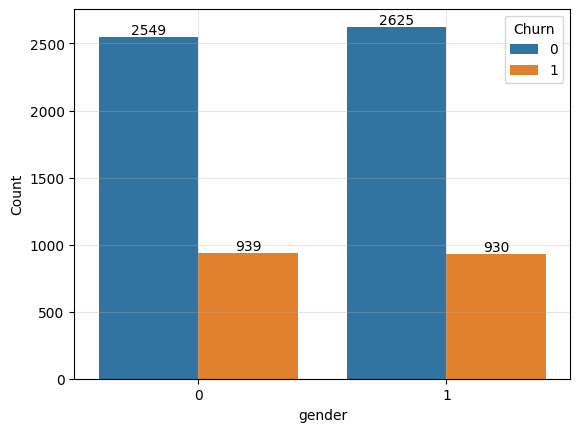

In [19]:
gc = sns.barplot(data=gender_churn,x='gender',y='Count',hue='Churn')
for i in gc.containers:
  gc.bar_label(i,)
plt.grid(alpha=0.30)
plt.show()

**Partners Vs Churn**

In [20]:
partner_churn = data.groupby(['Partner','Churn']).agg(Count=('Churn','count'))
partner_churn

Count
Partner Churn       
0       0       2441
        1       1200
1       0       2733
        1        669

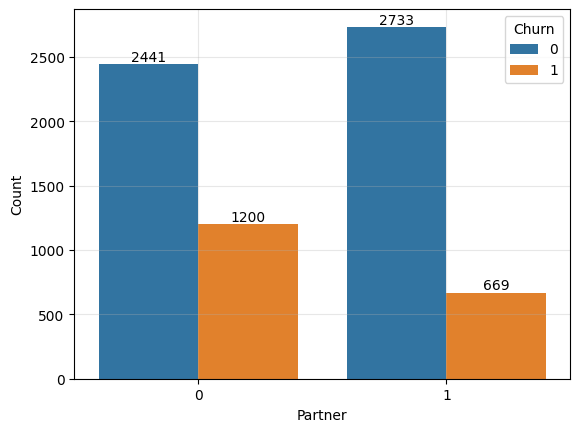

In [21]:
pc = sns.barplot(data=partner_churn, x='Partner', y='Count', hue='Churn')
for i in pc.containers:
  pc.bar_label(i,)
plt.grid(alpha=0.30)
plt.show()

**Dependents Vs Churn**

In [22]:
dependents_churn = data.groupby(['Dependents','Churn']).agg(Count=('Churn','count'))
dependents_churn

Count
Dependents Churn       
0          0       3390
           1       1543
1          0       1784
           1        326

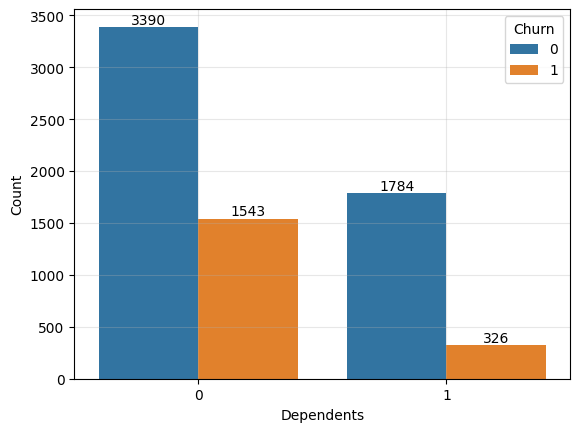

In [23]:
dc = sns.barplot(data=dependents_churn, x='Dependents', y='Count', hue='Churn')
for i in dc.containers:
  dc.bar_label(i,)
plt.grid(alpha=0.30)
plt.show()

**customer churn rate calculation**

In [24]:
Not_Churn =  len(data[data['Churn']==0])
Churn = len(data[data['Churn']==1])
total = len(data)

print(f"Percentage of the customer that will Not_Churn : {(Not_Churn/total)*100:.2f} %\n")
print(f"Percentage of the customer that will Churn : {(Churn/total)*100:.2f} %\n")

Percentage of the customer that will Not_Churn : 73.46 %

Percentage of the customer that will Churn : 26.54 %



# Customer Segmentation

**On the basis of TENURE**

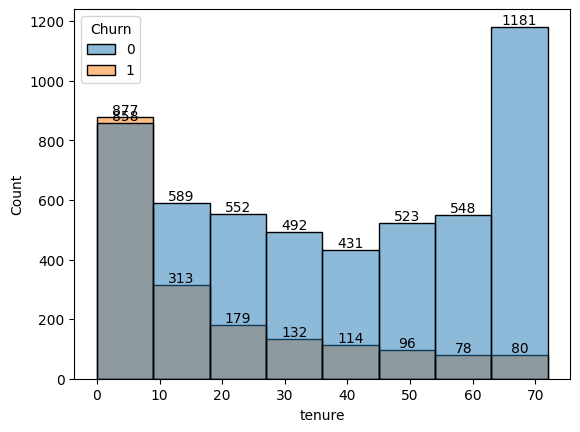

In [25]:
tc = sns.histplot(data,x='tenure',hue='Churn',bins=8)
for i in tc.containers:
  tc.bar_label(i,)
plt.show()

* customer with tenure less than 30 are at more risky , and will churn

**On the Basis of MONTHLY_CHARGES**

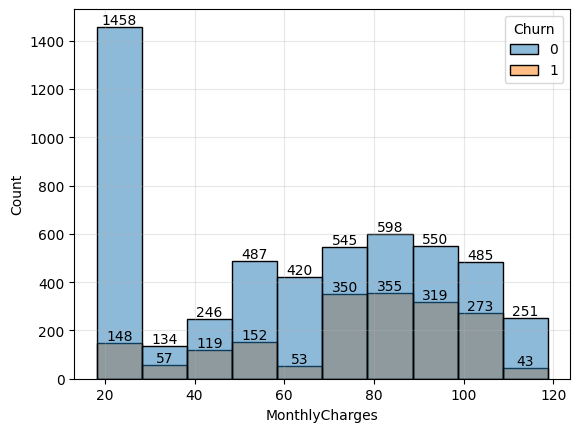

In [26]:
mc = sns.histplot(data,x='MonthlyCharges',hue='Churn',bins=10)
for i in mc.containers:
  mc.bar_label(i,)
plt.grid(alpha=0.30)
plt.show()

* Customers whose monthly expenditure is in range of 70-110 have more possibilities to Churn

**On the basis of CONTRACT**

In [27]:
contract_churn = data.groupby(['Contract','Churn']).agg(Count=('Churn','count'))
contract_churn

Count
Contract Churn       
0        0       2220
         1       1655
1        0       1307
         1        166
2        0       1647
         1         48

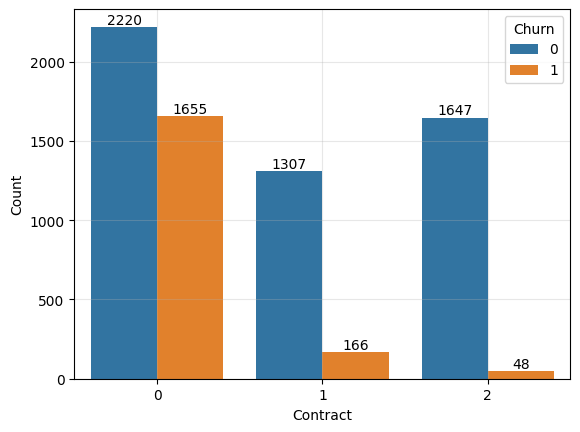

In [28]:
cc = sns.barplot(data=contract_churn,x='Contract',y='Count',hue='Churn')
for i in cc.containers:
  cc.bar_label(i,)
plt.grid(alpha=0.30)
plt.show()

* as '0' represents month-to-month contract in data and as from above visual we can say that customer have "month-to-month" Contract type are likely having more risk to Churn

# High Value Customers :-

* Customer with month-to-month contract needs special attention because of high churn rate.

* Customers having monthly_charges ranges between $70 - $100 dollars have a high chance to churn and needs the attention.

* Customers having tenure less than 20 days are more likely to churn.

-------------------------------------------------------------------------------------------------

# Splitting into Training and Testing set

In [29]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5634, 19), (1409, 19), (5634,), (1409,))

In [30]:
x_train.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2142,0,0,0,1,21,1,0,0,2,0,2,0,0,2,1,0,3,64.85,1336.80
1623,0,0,0,0,54,1,2,1,0,2,0,0,2,2,2,1,0,97.20,5129.45
6074,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,2,23.45,23.45


# Building Models without Any kind of Feature Selection Techniques

# Model_01 = Logistic Regression

In [31]:
LR = LogisticRegression()
model_01 = LR.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Prediction

In [32]:
pred_01 = model_01.predict(x_test)
pred_01

array([1, 0, 0, ..., 0, 0, 0])

# Evaluation


--------------------- Evaluation of Logistics Regression Model ---------------------------

Accuracy of Model_01 Logistic Regression : 0.8176


Classification Report

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1093
           1       0.58      0.68      0.63       316

    accuracy                           0.82      1409
   macro avg       0.74      0.77      0.75      1409
weighted avg       0.83      0.82      0.82      1409




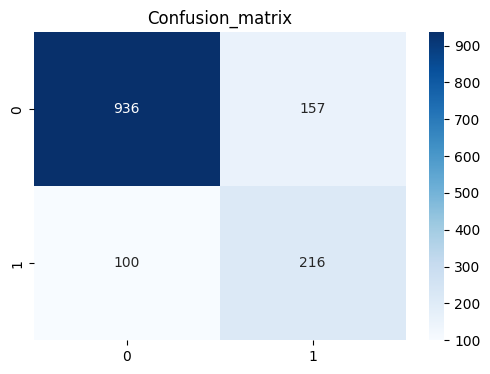


--------------------- Matrix of Logistic Regression Model ---------------------------

Precision for NOT Churn : 0.9035

Precision for Churn : 0.5791

Recall for NOT Churn : 0.8564

Recall for Churn : 0.6835

F1_Score for NOT Churn : 0.8793

F1_Score for Churn : 0.6270


In [33]:
print('\n--------------------- Evaluation of Logistics Regression Model ---------------------------\n')

accuracy_LR = accuracy_score(pred_01,y_test)
print(f"Accuracy of Model_01 Logistic Regression : {accuracy_LR:.4f}\n\n")

report1 = classification_report(pred_01,y_test)
print(f"Classification Report\n\n{report1}\n")

cm1 = confusion_matrix(pred_01,y_test)
plt.figure(figsize=(6,4))
sns.heatmap(cm1, cmap='Blues', annot=True,fmt='.4g')
plt.title("Confusion_matrix")
plt.show()

tn,fp,fn,tp = cm1.ravel()
print('\n--------------------- Matrix of Logistic Regression Model ---------------------------\n')

precision_0 = tn/(tn+fn)
print(f"Precision for NOT Churn : {precision_0:.4f}\n")
precision_1 = tp/(tp+fp)
print(f"Precision for Churn : {precision_1:.4f}\n")
recall_0 = tn/(tn+fp)
print(f"Recall for NOT Churn : {recall_0:.4f}\n")
recall_1 = tp/(tp+fn)
print(f"Recall for Churn : {recall_1:.4f}\n")
f1score_0 = (2*precision_0*recall_0)/(precision_0 + recall_0)
print(f"F1_Score for NOT Churn : {f1score_0:.4f}\n")
f1score_1 = (2*precision_1*recall_1)/(precision_1 + recall_1)
print(f"F1_Score for Churn : {f1score_1:.4f}")

# Model_02 = Random Forest Classifier

In [34]:
RF = RandomForestClassifier(n_estimators=150,
                            criterion='gini',
                            random_state=42,
                            )

model_02 = RF.fit(x_train,y_train)

# Prediction

In [35]:
pred_02 = model_02.predict(x_test)
pred_02

array([1, 0, 0, ..., 0, 0, 1])

# Evaluation of Model_02


--------------------- Evaluation of Random Forest Classifier Model ---------------------------

Accuracy of Model_02 Random Forest Classifier : 0.7956


Classification Report

              precision    recall  f1-score   support

           0       0.91      0.83      0.87      1144
           1       0.47      0.66      0.55       265

    accuracy                           0.80      1409
   macro avg       0.69      0.74      0.71      1409
weighted avg       0.83      0.80      0.81      1409




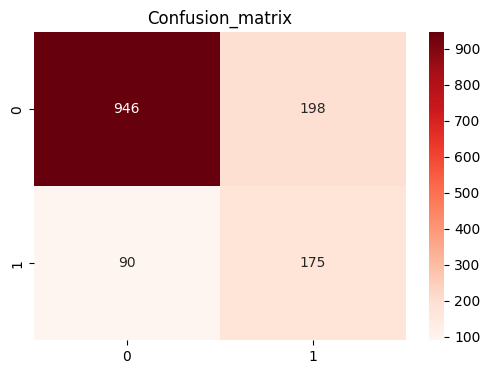


--------------------- Matrix of Random Forest Classifier Model ---------------------------

Precision for NOT Churn : 0.9131

Precision for Churn : 0.4692

Recall for NOT Churn : 0.8269

Recall for Churn : 0.6604

F1_Score for NOT Churn : 0.8679

F1_Score for Churn : 0.5486


In [36]:
print('\n--------------------- Evaluation of Random Forest Classifier Model ---------------------------\n')

accuracy_RF = accuracy_score(pred_02,y_test)
print(f"Accuracy of Model_02 Random Forest Classifier : {accuracy_RF:.4f}\n\n")

report2 = classification_report(pred_02,y_test)
print(f"Classification Report\n\n{report2}\n")

cm2 = confusion_matrix(pred_02,y_test)
plt.figure(figsize=(6,4))
sns.heatmap(cm2, cmap='Reds', annot=True, fmt='.4g')
plt.title("Confusion_matrix")
plt.show()

tn,fp,fn,tp = cm2.ravel()
print('\n--------------------- Matrix of Random Forest Classifier Model ---------------------------\n')

precision_0 = tn/(tn+fn)
print(f"Precision for NOT Churn : {precision_0:.4f}\n")
precision_1 = tp/(tp+fp)
print(f"Precision for Churn : {precision_1:.4f}\n")
recall_0 = tn/(tn+fp)
print(f"Recall for NOT Churn : {recall_0:.4f}\n")
recall_1 = tp/(tp+fn)
print(f"Recall for Churn : {recall_1:.4f}\n")
f1score_0 = (2*precision_0*recall_0)/(precision_0 + recall_0)
print(f"F1_Score for NOT Churn : {f1score_0:.4f}\n")
f1score_1 = (2*precision_1*recall_1)/(precision_1 + recall_1)
print(f"F1_Score for Churn : {f1score_1:.4f}")

# Insights -

* Accuracy of Logistic Regressor is found to be more than Random Forest.

* As both model suffers from overfitting due to more number of features.

* Let's perform Feature selection technique Recursive Feature Elimination and hyperparameter tuning then evaluate the model performance

# Using Feature Selection Technique - Recursive Feature Elimination (RFE)

In [37]:
estimator =  RandomForestClassifier(n_estimators=120,
                                    random_state=42)

# using RFE
selector = RFE(estimator,n_features_to_select=7)
selector = selector.fit(X,Y)

In [38]:
selected_features = [feature for feature,selected in zip(X.columns,selector.support_) if selected]
selected_features

['tenure',
 'OnlineSecurity',
 'TechSupport',
 'Contract',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

**updating the x_train and x_test with selected features only**

In [39]:
x_train_updated = x_train.loc[:,selected_features]
x_test_updated = x_test.loc[:,selected_features]
x_train_updated.shape, x_test_updated.shape

((5634, 7), (1409, 7))

# Building models with RFE

# Model_03 = Logistic Regression RFE

In [40]:
LR = LogisticRegression()
model_03 = LR.fit(x_train_updated,y_train)

pred_03 = model_03.predict(x_test_updated)
pred_03

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, ..., 0, 0, 1])

# Evaluation of Model_03

-------------- Evaluation of Model_03 Logistics Regression with updated features -----------------------------

Accuracy of Model_03 Logistic_Regressor : 0.8041


Classification Report

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1074
           1       0.58      0.64      0.61       335

    accuracy                           0.80      1409
   macro avg       0.73      0.75      0.74      1409
weighted avg       0.81      0.80      0.81      1409




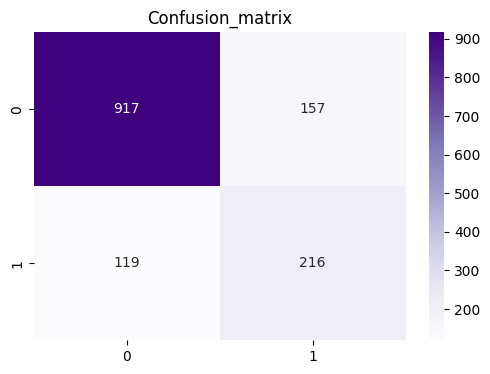


--------------------- Matrix of Logistic Regression Model ---------------------------

Precision for NOT Churn : 0.8851

Precision for Churn : 0.5791

Recall for NOT Churn : 0.8538

Recall for Churn : 0.6448

F1_Score for NOT Churn : 0.8692

F1_Score for Churn : 0.6102


In [41]:
print("-------------- Evaluation of Model_03 Logistics Regression with updated features -----------------------------\n")

accuracy_LR = accuracy_score(pred_03,y_test)
print(f"Accuracy of Model_03 Logistic_Regressor : {accuracy_LR:.4f}\n\n")

report1 = classification_report(pred_03,y_test)
print(f"Classification Report\n\n{report1}\n")

cm1 = confusion_matrix(pred_03,y_test)
plt.figure(figsize=(6,4))
sns.heatmap(cm1, cmap='Purples', annot=True, fmt='.4g')
plt.title("Confusion_matrix")
plt.show()

tn,fp,fn,tp = cm1.ravel()
print('\n--------------------- Matrix of Logistic Regression Model ---------------------------\n')

precision_0 = tn/(tn+fn)
print(f"Precision for NOT Churn : {precision_0:.4f}\n")
precision_1 = tp/(tp+fp)
print(f"Precision for Churn : {precision_1:.4f}\n")
recall_0 = tn/(tn+fp)
print(f"Recall for NOT Churn : {recall_0:.4f}\n")
recall_1 = tp/(tp+fn)
print(f"Recall for Churn : {recall_1:.4f}\n")
f1score_0 = (2*precision_0*recall_0)/(precision_0 + recall_0)
print(f"F1_Score for NOT Churn : {f1score_0:.4f}\n")
f1score_1 = (2*precision_1*recall_1)/(precision_1 + recall_1)
print(f"F1_Score for Churn : {f1score_1:.4f}")

# Insights -  as no sign of increase in accuracy in Logistics regression model

# Model_04 = Hyperparamter tuning on Random Forest Classifier

# Using RandomSearchCV for finding best parameters for RFC

In [42]:
# parameters of Random Forest
parameters_RF = {
                'n_estimators' : [100,150,180,200,300,400],
                'criterion' : ['gini','entropy'],
                'min_samples_split' : [2,3,5,10],
                'min_samples_leaf' : [2,3,5,10],
                'max_features' : [5,7,8,10],
                'max_depth' : [2,3,5,7]
                }

# creating random model
RF2 = RandomForestClassifier()
random_search_model = RandomizedSearchCV(estimator = RF2,
                                         param_distributions = parameters_RF,
                                         cv=5, random_state = 42,
                                         n_iter=10)


random_serach_model = random_search_model.fit(x_train_updated,y_train)

In [43]:
# best parameters of the random_model
best_params = random_search_model.best_params_
print(f"Best Parameter\n  {best_params}\n")

# creating best_model instance from random_model
model_04 = random_search_model.best_estimator_

pred_04 = model_04.predict(x_test_updated)
pred_04

Best Parameter
  {'n_estimators': 180, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 10, 'max_depth': 5, 'criterion': 'gini'}



array([1, 0, 0, ..., 0, 0, 1])

# Evalution of Model_04 (Tuned Random Forest Classifier)


--------------------- Evaluation of Model_04 (Tuned Random Forest Classifier Model)  ---------------------------

Accuracy of Model_04 (Tuned RFC) : 0.8062


Classification Report

              precision    recall  f1-score   support

           0       0.92      0.83      0.88      1149
           1       0.48      0.69      0.57       260

    accuracy                           0.81      1409
   macro avg       0.70      0.76      0.72      1409
weighted avg       0.84      0.81      0.82      1409




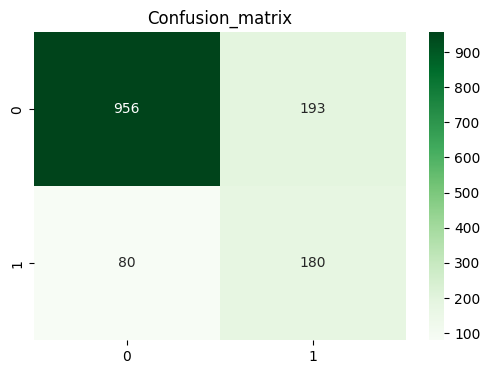


--------------------- Matrix of Model_04 TUNED RFC---------------------------

Precision for NOT Churn : 0.9228

Precision for Churn : 0.4826

Recall for NOT Churn : 0.8320

Recall for Churn : 0.6923

F1_Score for NOT Churn : 0.8751

F1_Score for Churn : 0.5687


In [44]:
print('\n--------------------- Evaluation of Model_04 (Tuned Random Forest Classifier Model)  ---------------------------\n')

accuracy_best_model = accuracy_score(pred_04,y_test)
print(f"Accuracy of Model_04 (Tuned RFC) : {accuracy_best_model:.4f}\n\n")

report_RF2 = classification_report(pred_04,y_test)
print(f"Classification Report\n\n{report_RF2}\n")

cm_RF2 = confusion_matrix(pred_04,y_test)
plt.figure(figsize=(6,4))
sns.heatmap(cm_RF2, cmap='Greens', annot=True, fmt='.4g')
plt.title("Confusion_matrix")
plt.show()

tn,fp,fn,tp = cm_RF2.ravel()
print('\n--------------------- Matrix of Model_04 TUNED RFC---------------------------\n')

precision_0 = tn/(tn+fn)
print(f"Precision for NOT Churn : {precision_0:.4f}\n")
precision_1 = tp/(tp+fp)
print(f"Precision for Churn : {precision_1:.4f}\n")
recall_0 = tn/(tn+fp)
print(f"Recall for NOT Churn : {recall_0:.4f}\n")
recall_1 = tp/(tp+fn)
print(f"Recall for Churn : {recall_1:.4f}\n")
f1score_0 = (2*precision_0*recall_0)/(precision_0 + recall_0)
print(f"F1_Score for NOT Churn : {f1score_0:.4f}\n")
f1score_1 = (2*precision_1*recall_1)/(precision_1 + recall_1)
print(f"F1_Score for Churn : {f1score_1:.4f}")

# Insights -

* hyperparamter tuning and feature selection techniques are not much effective for this dataset.

* since the accuracy of the initial logistics regression model is high as compared to all other 3 models even the tuned random forest classifier was not able to get accuracy more than 81%.

# Model_04 Evaluation of Selected Features Importances

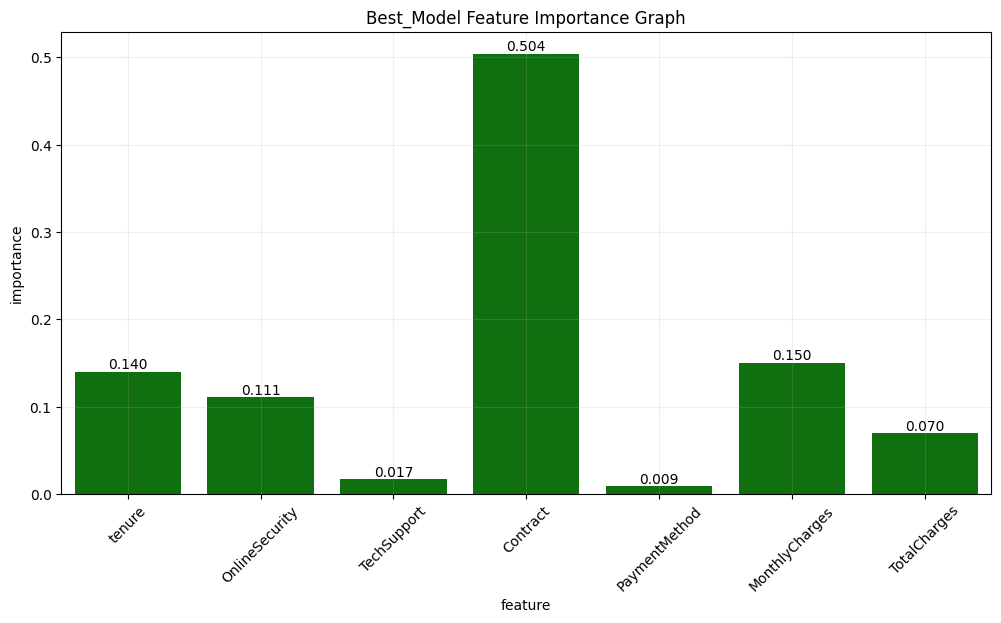

In [45]:
# for best_model

best_model_feature_importances = pd.DataFrame({'feature' : selected_features,
                                               'importance' : model_04.feature_importances_ })

plt.figure(figsize=(12,6))
bm = sns.barplot(data=best_model_feature_importances,x='feature',y='importance',color='green')
for i in bm.containers:
  bm.bar_label(i,fmt='%.3f')
plt.xticks(rotation=45)
plt.grid(alpha=0.20)
plt.title("Best_Model Feature Importance Graph")
plt.show()

# Model_02 evaluation of feature importance

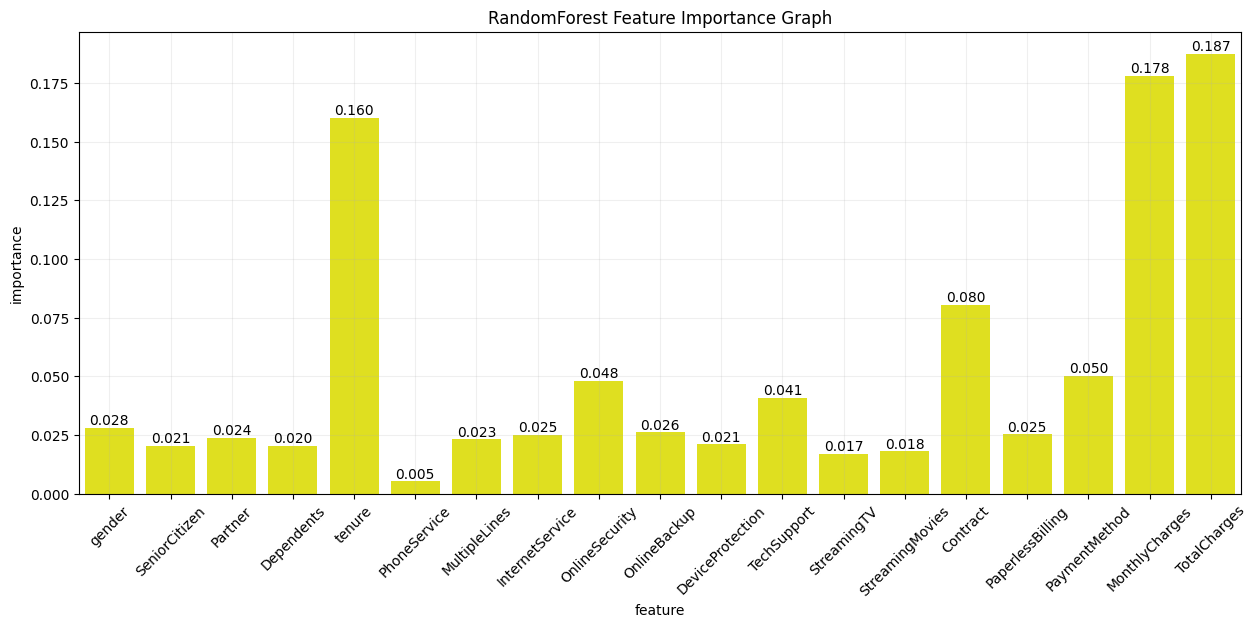

In [46]:
# For RandomForestclassifier
RF_feature_importances = pd.DataFrame({'feature' : X.columns,
                                       'importance' : model_02.feature_importances_})

plt.figure(figsize=(15,6))
bm = sns.barplot(data=RF_feature_importances,x='feature',y='importance',color='yellow')
for i in bm.containers:
  bm.bar_label(i,fmt='%.3f')
plt.xticks(rotation=45)
plt.grid(alpha=0.20)
plt.title("RandomForest Feature Importance Graph")
plt.show()

# ROC and AUC Curve Analysis

# Model_01(LR) and Model_02(RFC) - [without RFE]

In [47]:
# for Poistive Labels - which mean customer that will Churn
y_proba_model_01 = model_01.predict_proba(x_test)[:,1]
y_proba_model_02 = model_02.predict_proba(x_test)[:,1]

# creating a DataFrame for the probability values by models
auc_df_01 = pd.DataFrame({'True' : y_test,
                          'Model_01 LR' : y_proba_model_01,
                          'Model_02 RFC' : y_proba_model_02})
auc_df_01

,True,Model_01 LR,Model_02 RFC
185,1,0.589637,0.793333
2715,0,0.068495,0.100000
3825,0,0.004471,0.006667
1807,1,0.579065,0.693333
132,0,0.008269,0.053333
...,...,...,...
6366,0,0.018136,0.006667
315,0,0.099401,0.306667
2439,0,0.059785,0.000000
5002,0,0.011324,0.013333


# Plotting ROC and AUC (Model_01 and Model_02)

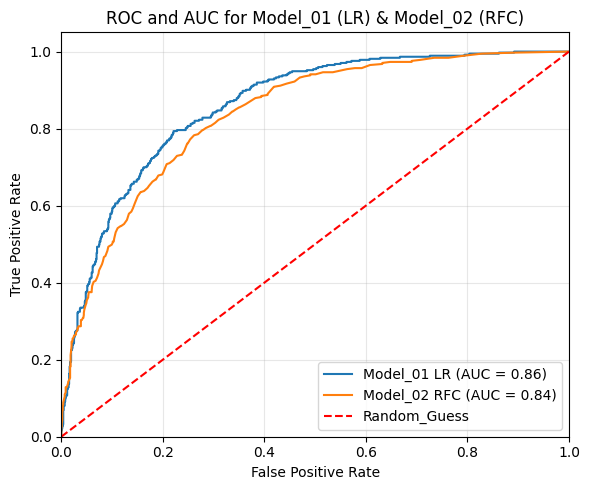

In [48]:
plt.figure(figsize=(6,5))

for model in ['Model_01 LR','Model_02 RFC']:
  fpr,tpr,threshold = roc_curve(auc_df_01['True'],auc_df_01[model])
  AUC = auc(fpr,tpr)
  plt.plot(fpr,tpr, label=f"{model} (AUC = {AUC:.2f})")

plt.plot([0,1],[0,1], 'r--', label = 'Random_Guess')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC and AUC for Model_01 (LR) & Model_02 (RFC)")
plt.legend()
plt.grid(alpha=0.30)
plt.tight_layout()
plt.show()

# ROC and AUC for Model_03(LR) and Model_04(Tuned RFC) -- [with RFE]

In [49]:
y_proba_model_03 = model_03.predict_proba(x_test_updated)[:,1]     # 1 is for positive class
y_proba_model_04 = model_04.predict_proba(x_test_updated)[:,1]

auc_df_02 = pd.DataFrame({'True' : y_test,
                        'Model_03 LR' : y_proba_model_03,
                        'Model_04 Tuned RFC' : y_proba_model_04})
auc_df_02.sample(5)

,True,Model_03 LR,Model_04 Tuned RFC
2509,0,0.001810,0.006398
6927,0,0.284480,0.226462
3395,0,0.176049,0.187907
1616,0,0.004167,0.011081
5316,0,0.239494,0.138456


# Plotting ROC and AUC for Model_03 and Model_04

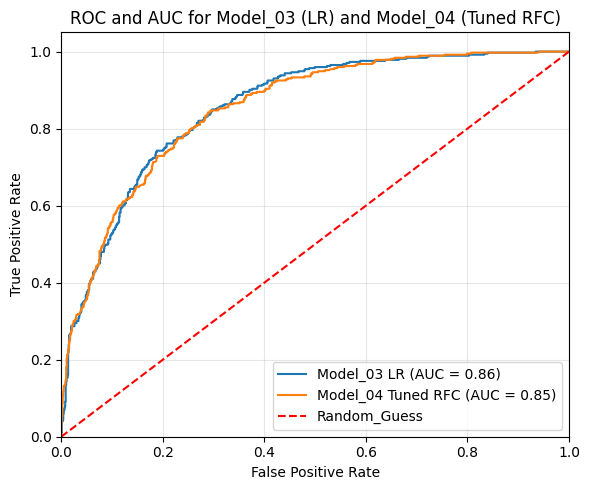

In [50]:
plt.figure(figsize=(6,5))

for model in ['Model_03 LR','Model_04 Tuned RFC']:
  fpr, tpr, _ = roc_curve(auc_df_02['True'], auc_df_02[model])
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, label=f"{model} (AUC = {roc_auc:.2f})")

plt.plot([0,1],[0,1], 'r--', label='Random_Guess')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC and AUC for Model_03 (LR) and Model_04 (Tuned RFC)")
plt.legend()
plt.tight_layout()
plt.grid(alpha=0.30)
plt.show()

# Insights of ROC and AUC :-   

* AUC of Logistic Regression Model_01 is slightly more as compared to Random forest classifier Model_02 it means that Model_01 performs slightly better than model_02 in predicting class better.

* AUC of model_03 and model_04 are is same therefore feature selection and hyperparameter tuning for Random forest classifier is not much effective in this dataset, therefore it is advised to build a simpler model that works fine with the dataset , cause hyperparameter tuning consume time and increases computational cost.

# **Business Recommendation**

# 1. Contract Type: Month-to-month customers have higher churn. Offer discounts on 1–2 year plans to encourage long-term commitment.

# 2. Tenure: Longer tenure reduces churn. Promote plans that encourage long-term customer retention.

# 3. Monthly Charges: Customers paying $70–$110 are more likely to churn. Offer competitive, value-driven plans in this range to retain them.

# **Thank You**